Some exemple of effective MR radius on gamma distribution $\left(r_{eff} = \sqrt[4]{\frac{\langle r^6 \rangle}{\langle r^2 \rangle}}\right)$

In [43]:
import numpy as np
from scipy.stats import gamma
from scipy.special import gamma as gammafunc
import pylab as pl

Gamma distributions have 2 parameters, shape ($k$) and scale ($\theta$).

The pdf of a gamma is $\displaystyle p(x) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-\frac{x}{\theta}}$

The mean is $k\theta$

The mode (distribution peak) is at  $\begin{cases}
       (k-1)\theta & k > 1\\
       0 & \text{otherwise.} \\ 
     \end{cases}$

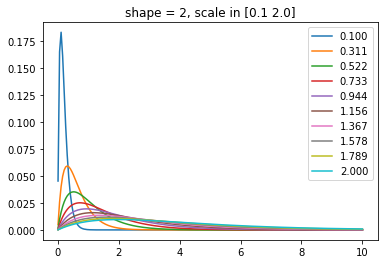

In [31]:
# gamma distribution, many scale, keeping shape=2
scales = np.linspace(0.1, 2, 10)
shape = 2
axon_diam = np.linspace(0.01, 10, 200)
pl.figure()
for scale in scales:
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    # plot nomalized distribution
    pl.plot(axon_diam, tmp_dist/tmp_dist.sum(), label = '{:.3f}'.format(scale))
pl.legend()
pl.title('shape = {}, scale in [{} {}]'.format(shape, scales.min(), scales.max()))
pl.show()
    


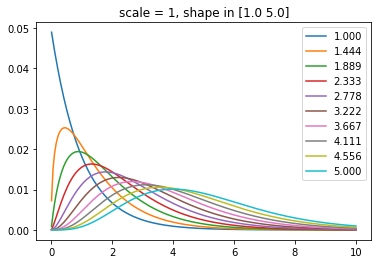

In [34]:
# gamma distribution, many shape, keeping scale=1
shapes = np.linspace(1, 5, 10)
scale = 1
axon_diam = np.linspace(0.01, 10, 200)
pl.figure()
for shape in shapes:
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    # plot nomalized distribution
    pl.plot(axon_diam, tmp_dist/tmp_dist.sum(), label = '{:.3f}'.format(shape))
pl.legend()
pl.title('scale = {}, shape in [{} {}]'.format(scale, shapes.min(), shapes.max()))
pl.show()

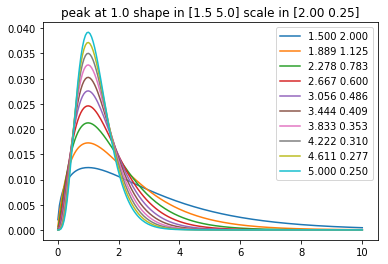

In [38]:
# gamma distribution, many shape, many scale, peak at 1
shapes = np.linspace(1.5, 5, 10)
scales = (1/(shapes-1.0))
axon_diam = np.linspace(0.01, 10, 200)
pl.figure()
for i in range(len(shapes)):
    shape = shapes[i]
    scale = scales[i]
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    # plot nomalized distribution
    pl.plot(axon_diam, tmp_dist/tmp_dist.sum(), label = '{:.3f} {:.3f}'.format(shape, scale))
pl.legend()
pl.title('peak at {:.1f} shape in [{} {}] scale in [{:.2f} {:.2f}]'.format((shapes[0]-1)*scales[0],shapes.min(), shapes.max(), scales.max(), scales.min()))
pl.show()

The t-th moment of a gamma distribution $\Gamma(k,\theta)$ is $E[x^t] = \frac{\theta^t \Gamma(t+k)}{\Gamma(k)}$

Giving us an analyical MR radius of 
$$r_eff = \sqrt[4]{\frac{\langle r^6 \rangle}{\langle r^2 \rangle}}$$ 

$$= \sqrt[4]{\frac{\frac{\theta^6 \Gamma(6+k)}{\Gamma(k)}}{\frac{\theta^2 \Gamma(2+k)}{\Gamma(k)}}}$$

$$= \theta \sqrt[4]{\frac{\Gamma(6+k)}{\Gamma(2+k)}}$$

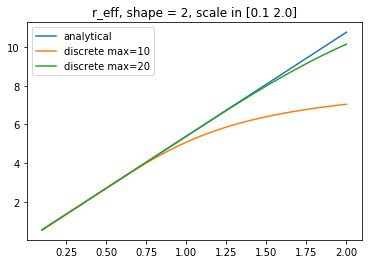

In [51]:
# MR radius, gamma distribution, many scale, keeping shape=2
# vs discrete value inside [0.01 10/20] interval

scales = np.linspace(0.1, 2, 100)
shape = 2
axon_diam = np.linspace(0.01, 10, 200)
axon_diam2 = np.linspace(0.01, 20, 200)

analytical = scales * (gammafunc(shape+6)/gammafunc(shape+2))**(1/4.)
discrete = []
discrete2 = []

for scale in scales:
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    
    mom6 = (tmp_dist*axon_diam**6 / tmp_dist.sum()).sum()
    mom2 = (tmp_dist*axon_diam**2 / tmp_dist.sum()).sum()
    discrete.append((mom6/mom2)**(1/4.))
    
    tmp_dist2 = fulldist.pdf(axon_diam2)
    
    mom6 = (tmp_dist2*axon_diam2**6 / tmp_dist2.sum()).sum()
    mom2 = (tmp_dist2*axon_diam2**2 / tmp_dist2.sum()).sum()
    discrete2.append((mom6/mom2)**(1/4.))

pl.figure()
pl.plot(scales, analytical, label='analytical')
pl.plot(scales, discrete, label='discrete max={}'.format(10))
pl.plot(scales, discrete2, label='discrete max={}'.format(20))
pl.legend()
pl.title('r_eff, shape = {}, scale in [{} {}]'.format(shape, scales.min(), scales.max()))
pl.show()

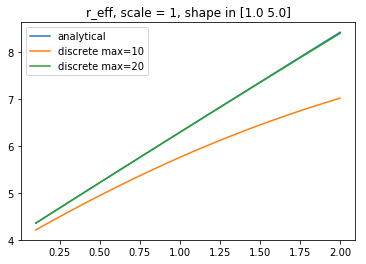

In [52]:
# MR radius, gamma distribution, many shape, keeping scale=1
# vs discrete value inside [0.01 10/20] interval

shapes = shapes = np.linspace(1, 5, 100)
scale = 1
axon_diam = np.linspace(0.01, 10, 200)
axon_diam2 = np.linspace(0.01, 20, 200)

analytical = scale * (gammafunc(shapes+6)/gammafunc(shapes+2))**(1/4.)
discrete = []
discrete2 = []

for shape in shapes:
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    
    mom6 = (tmp_dist*axon_diam**6 / tmp_dist.sum()).sum()
    mom2 = (tmp_dist*axon_diam**2 / tmp_dist.sum()).sum()
    discrete.append((mom6/mom2)**(1/4.))
    
    tmp_dist2 = fulldist.pdf(axon_diam2)
    
    mom6 = (tmp_dist2*axon_diam2**6 / tmp_dist2.sum()).sum()
    mom2 = (tmp_dist2*axon_diam2**2 / tmp_dist2.sum()).sum()
    discrete2.append((mom6/mom2)**(1/4.))

pl.figure()
pl.plot(scales, analytical, label='analytical')
pl.plot(scales, discrete, label='discrete max={}'.format(10))
pl.plot(scales, discrete2, label='discrete max={}'.format(20))
pl.legend()
pl.title('r_eff, scale = {}, shape in [{} {}]'.format(scale, shapes.min(), shapes.max()))
pl.show()

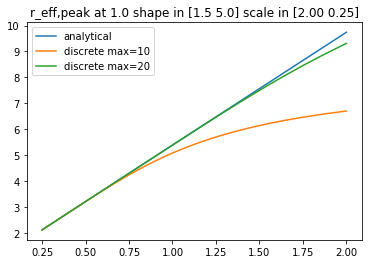

In [53]:
# MR radius, gamma distribution, many shape, many scale, peak at 1
shapes = np.linspace(1.5, 5, 100)
scales = (1/(shapes-1.0))

analytical = scales * (gammafunc(shapes+6)/gammafunc(shapes+2))**(1/4.)
discrete = []
discrete2 = []

axon_diam = np.linspace(0.01, 10, 200)
axon_diam2 = np.linspace(0.01, 20, 200)

for i in range(len(shapes)):
    shape = shapes[i]
    scale = scales[i]
    fulldist = gamma.freeze(shape, loc = 0, scale = scale)
    tmp_dist = fulldist.pdf(axon_diam)
    
    mom6 = (tmp_dist*axon_diam**6 / tmp_dist.sum()).sum()
    mom2 = (tmp_dist*axon_diam**2 / tmp_dist.sum()).sum()
    discrete.append((mom6/mom2)**(1/4.))
    
    tmp_dist2 = fulldist.pdf(axon_diam2)
    
    mom6 = (tmp_dist2*axon_diam2**6 / tmp_dist2.sum()).sum()
    mom2 = (tmp_dist2*axon_diam2**2 / tmp_dist2.sum()).sum()
    discrete2.append((mom6/mom2)**(1/4.))

pl.figure()
pl.plot(scales, analytical, label='analytical')
pl.plot(scales, discrete, label='discrete max={}'.format(10))
pl.plot(scales, discrete2, label='discrete max={}'.format(20))
pl.legend()
pl.title('r_eff, peak at {:.1f} shape in [{} {}] scale in [{:.2f} {:.2f}]'.format((shapes[0]-1)*scales[0],shapes.min(), shapes.max(), scales.max(), scales.min()))
pl.show()
